In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Explanatory Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Check for Null Values
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [23]:
df.groupby(['quality']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
0             8.236831          0.547022     0.254407        2.512120   
1             8.847005          0.405530     0.376498        2.708756   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
0         0.089281            16.172214             48.285818  0.996859   
1         0.075912            13.981567             34.889401  0.996030   

               pH  sulphates    alcohol  
quality                                  
0        3.314616   0.644754  10.251037  
1        3.288802   0.743456  11.518049

Text(0.5, 1.0, 'Number of wines for each quality category')

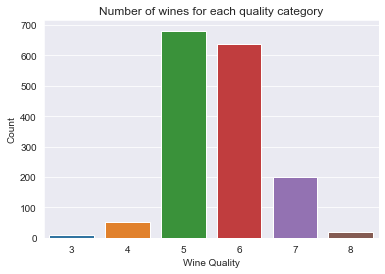

In [7]:
sns.barplot(x=df['quality'].unique(), y=df['quality'].value_counts())
plt.ylabel('Count')
plt.xlabel('Wine Quality')
plt.title('Number of wines for each quality category')

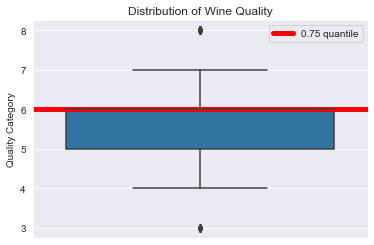

In [8]:
sns.boxplot(y=df['quality'].values)
plt.title('Distribution of Wine Quality')
plt.ylabel('Quality Category')
plt.axhline(np.quantile(df['quality'].values, 0.75), 1, 0, color='red', linewidth=5, label='0.75 quantile')
plt.legend()

In [9]:
# Everything above the 0.75 quantile is considered to be good quality (1) while everything below is considered being rather bad (0) quality
border = np.quantile(df['quality'].values, 0.75)
df['quality'] = [1 if i>border else 0 for i in df['quality']]
df['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

# Train & Test Data

In [10]:
X_data = df.drop(['quality'], axis=1).values
y_data = df['quality'].values

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
X_data = scaler.transform(X_data.astype(float))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1119, 11) (1119,)
Test set: (480, 11) (480,)


# K-Nearest-Neighbour Classification

In [13]:
# Create K-Nearest Neighbour and calculate accuracy for different 'Ks'
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 50
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train Model and Predict
    clm = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clm.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

best_K = mean_acc.argmax()+1
print('Maximum Accuracy achieved:', mean_acc.max(), 'at', best_K)

Maximum Accuracy achieved: 0.8916666666666667 at 2


Text(0, 0.5, 'Accuracy')

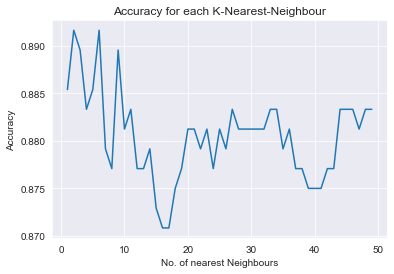

In [14]:
plt.plot(range(1, Ks), mean_acc)
plt.title('Accuracy for each K-Nearest-Neighbour')
plt.xlabel('No. of nearest Neighbours')
plt.ylabel('Accuracy')

In [15]:
# Evaluate Model with a distplot
def evaluate_distplot(y_test, yhat):
    """
    y_test: Test-Data (Target)
    yhat: Predicted Data (Target) 
    """
    y_test_std = y_test.std()
    y_test_mean = y_test.mean()
    y_test_median = np.median(y_test)
    sns.set_style("darkgrid")
    sns.distplot(y_test, hist=False, label='Actual Value')
    sns.distplot(yhat, hist=False, label='Predicted Value')
    plt.axvline(y_test_mean, 1, 0, color='black', label='Mean of Test-Data')
    plt.axvline(y_test_mean+y_test_std, 1, 0, color='grey')
    plt.axvline(y_test_mean-y_test_std, 1, 0, color='grey', label='+/- 1 standard deviation')
    plt.axvline(y_test_median, 1, 0, color='darkblue', label='Median of Test-Data')
    # plt.xlim(y_test_mean-2*y_test_std, y_test_mean+2*y_test_std)
    plt.legend()
    plt.title('Test Data Prediction vs. Actual Value')
    plt.show()

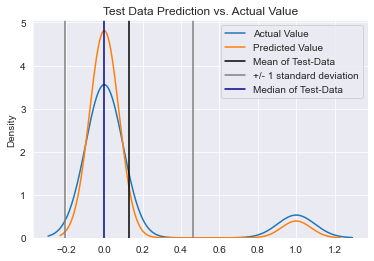

In [16]:
clm = KNeighborsClassifier(n_neighbors=best_K).fit(X_train, y_train)
yhat = clm.predict(X_test)
evaluate_distplot(y_test, yhat)

# Decision Tree Classification

In [17]:
from sklearn import tree

In [18]:
clm_tree = tree.DecisionTreeClassifier(criterion="entropy")
clm_tree.fit(X_train, y_train)
pred_tree = clm_tree.predict(X_test)
print("Decision Trees's Accuracy:", metrics.accuracy_score(y_test, pred_tree))

Decision Trees's Accuracy: 0.8791666666666667


In [19]:
# Extract Features & Class Names
feature_names = df.drop(['quality'], axis=1) # get feature columns
feature_names = list(feature_names.columns) # get feature columns

class_names = list(df['quality'].value_counts().index) # get classification names
class_names = list(map(str, class_names))
class_names.sort()

Export Done


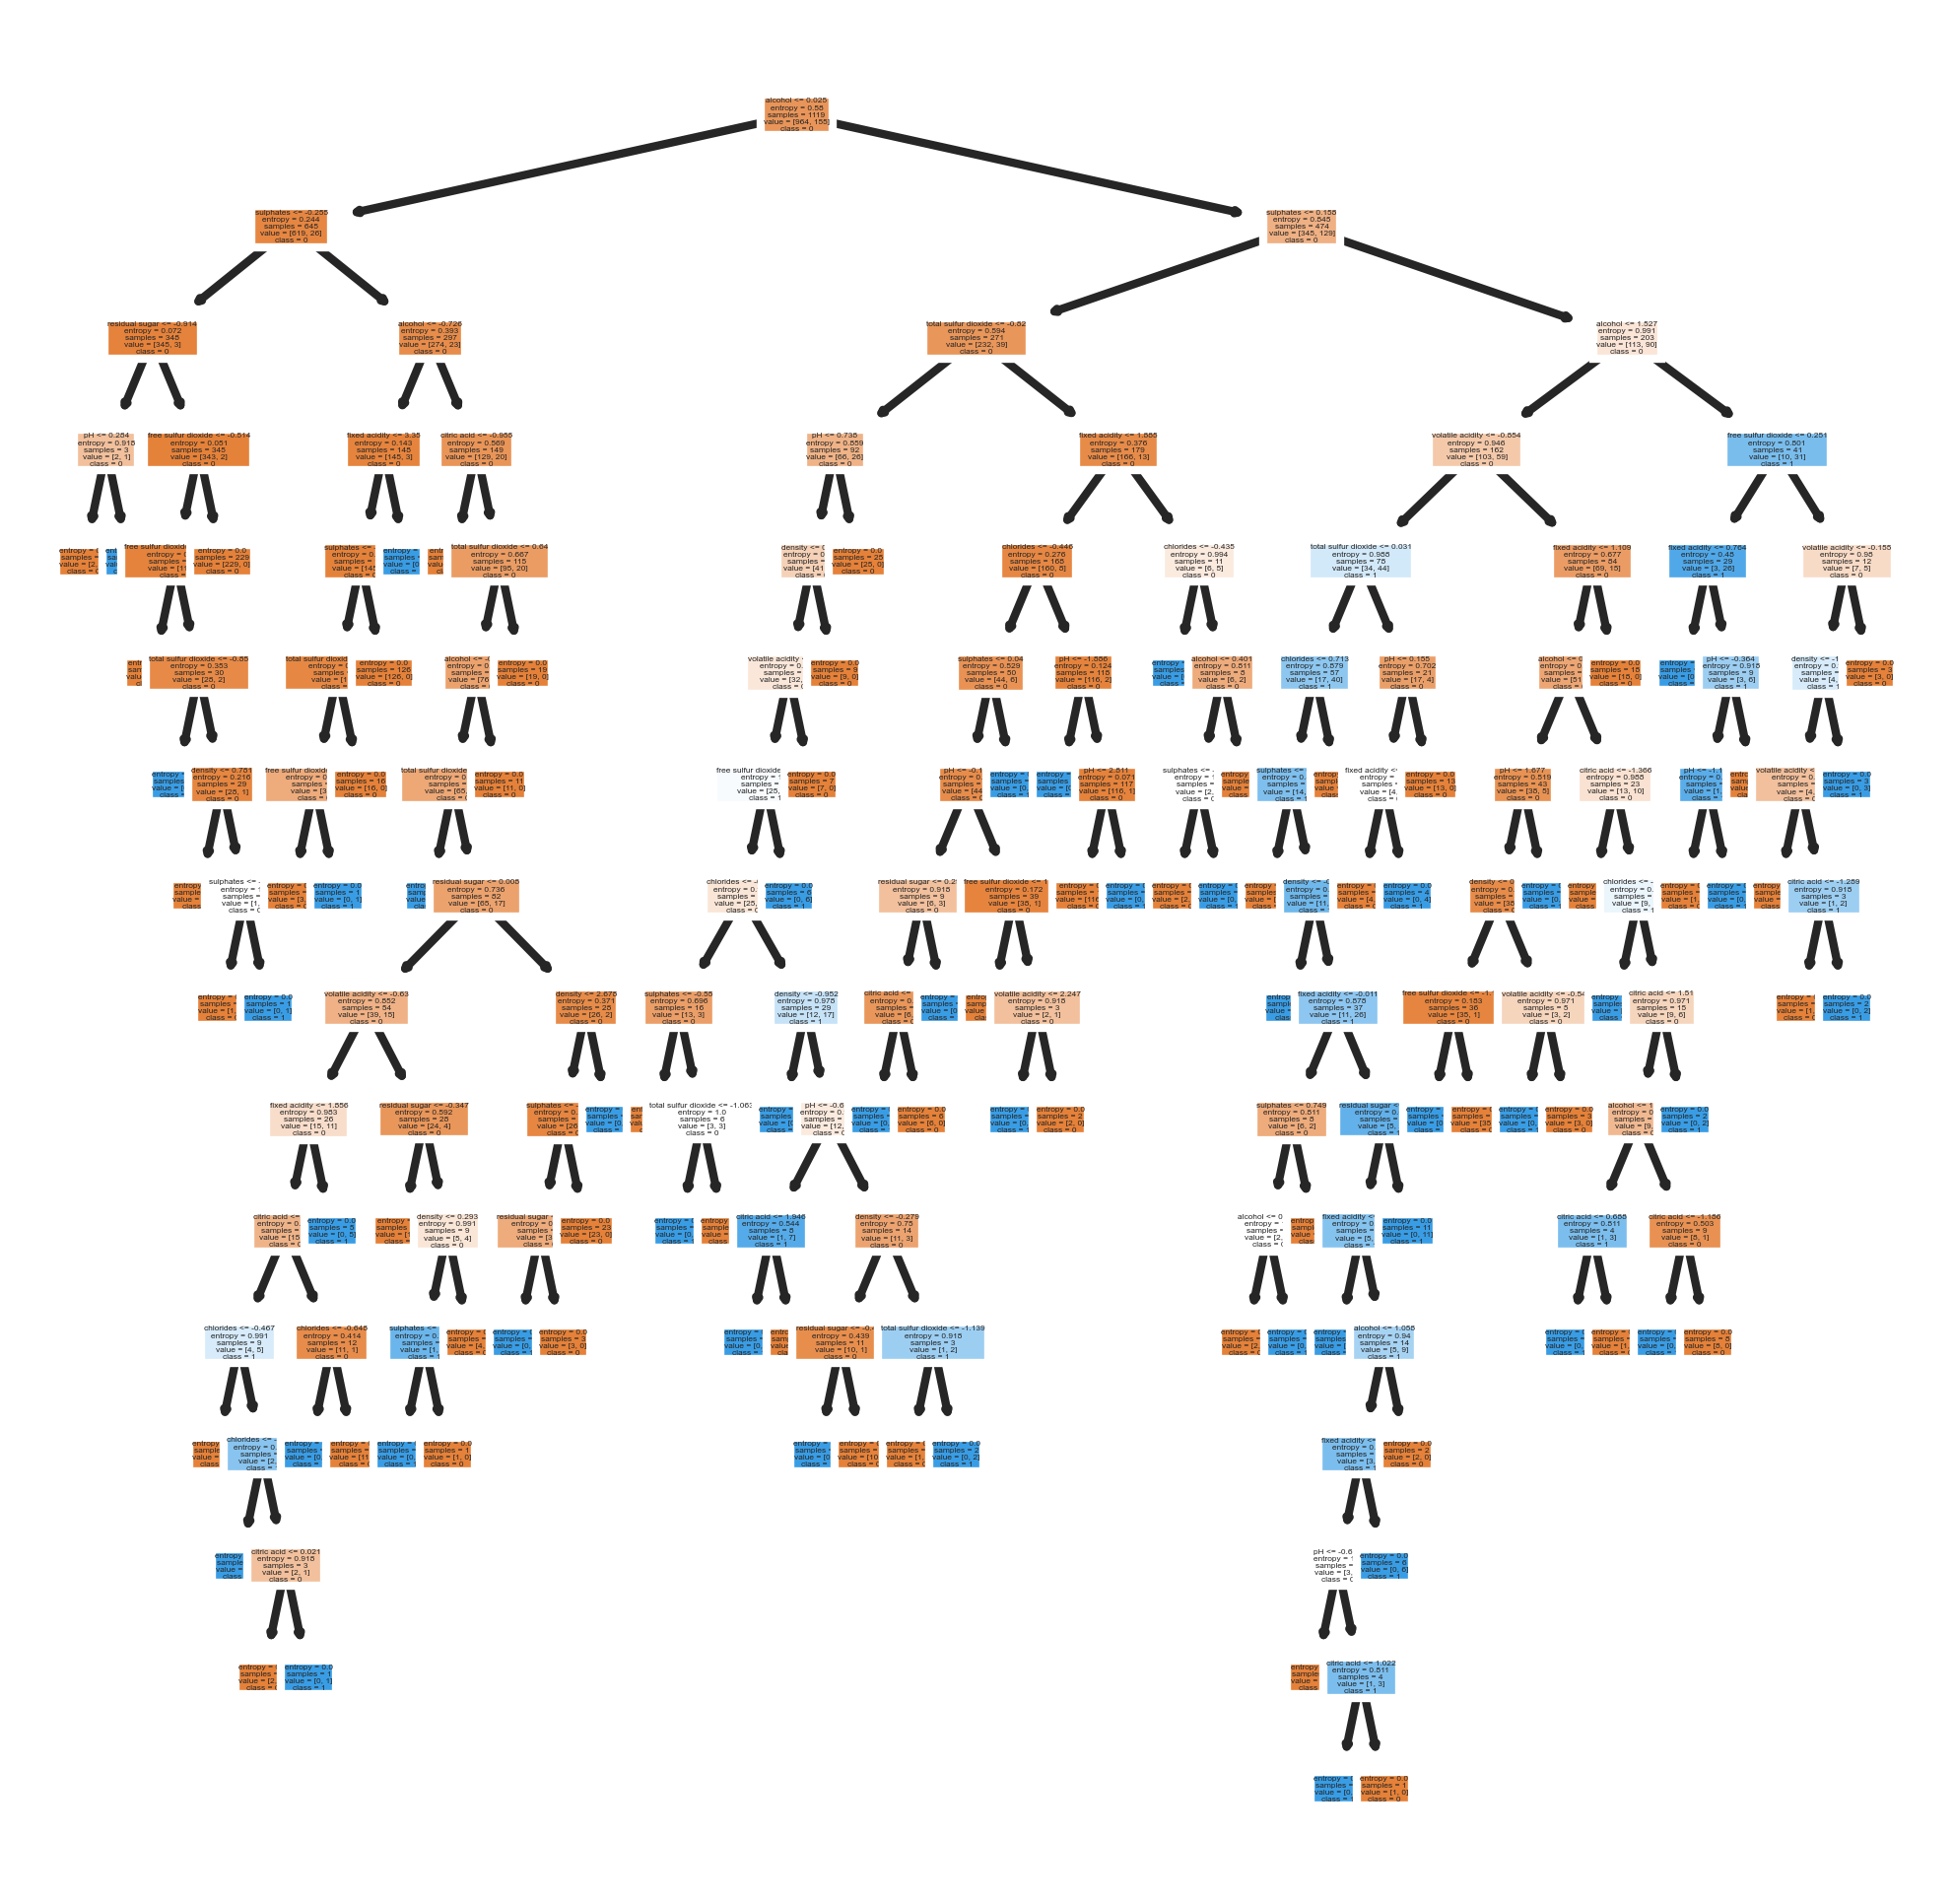

In [20]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
a = tree.plot_tree(clm_tree, feature_names=feature_names, class_names=class_names, filled=True);
fig.savefig('decision_tree.png');
print('Export Done')

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

n = 10
mean_acc = np.zeros((n))

for i in range(0, n):
    clm_rf = RandomForestClassifier()
    clm_rf.fit(X_train, y_train)
    yhat = clm_rf.predict(X_test)
    acc = metrics.accuracy_score(y_test, yhat)
    mean_acc[i] = acc
    print(f'{i+1}/{n} done: {round(acc, 4)}')

print(f"Mean Accuracy after {n} runs: {mean_acc.mean()}")

1/10 done: 0.8979
2/10 done: 0.9042
3/10 done: 0.9125
4/10 done: 0.9021
5/10 done: 0.9021
6/10 done: 0.9146
7/10 done: 0.9083
8/10 done: 0.9
9/10 done: 0.8938
10/10 done: 0.8958
Mean Accuracy after 10 runs: 0.9031250000000002


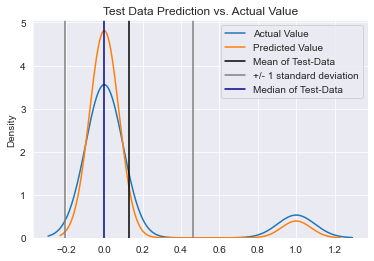

In [22]:
evaluate_distplot(y_test, yhat)

<h1>Accuracy Overview</h1>
<li>Nearest Neighbor: ~0.89 with K = 2</li>
<li>Decision Tree: ~0.88</li>
<li>Random Forest: ~0.9 (average after 10 runs)</li>

<p>Based on the results, we would chose the Random Forest Classificator</p>